In [1]:
!pip install seaborn

In [2]:
!pip install dvclive

In [3]:
!git init

Reinitialized existing Git repository in C:/Users/achla/Downloads/ML/dvc/dvc_flights_price_prediction/.git/


In [5]:
!dvc init -f

Initialized DVC repository.

You can now commit the changes to git.

+---------------------------------------------------------------------+
|                                                                     |
|        DVC has enabled anonymous aggregate usage analytics.         |
|     Read the analytics documentation (and how to opt-out) here:     |
|             <https://dvc.org/doc/user-guide/analytics>              |
|                                                                     |
+---------------------------------------------------------------------+

What's next?
------------
- Check out the documentation: <https://dvc.org/doc>
- Get help and share ideas: <https://dvc.org/chat>
- Star us on GitHub: <https://github.com/iterative/dvc>


In [6]:
!git config --global user.name "amsha16"
!git config --global user.email "sharma.yashi@gmail.com"

In [7]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   FlightsPricePrediction.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	DNC.ipynb
	Untitled.ipynb
	duration_vs_price.csv

no changes added to commit (use "git add" and/or "git commit -a")


In [5]:
!git commit -m "Initialised DVC for flights proce prediction"

[master (root-commit) 5485eec] Initialised DVC for flights proce prediction
 3 files changed, 6 insertions(+)
 create mode 100644 .dvc/.gitignore
 create mode 100644 .dvc/config
 create mode 100644 .dvcignore


In [8]:
!git log

commit 437d701ef82ef2a867645796bb539cfb6799e923
Author: amsha16 <sharma.yashi@gmail.com>
Date:   Thu Sep 18 17:57:29 2025 +0530

    adding all files to Repo

commit 209c402236dde55dfc9f55e053fa1d0911368407
Author: amsha16 <sharma.yashi@gmail.com>
Date:   Thu Sep 18 17:47:30 2025 +0530

    Committing model, data, and experiment files for RF model

commit 347215e1a12a23ed538cb496ceedfe812c927f6e
Author: amsha16 <sharma.yashi@gmail.com>
Date:   Thu Sep 18 14:27:54 2025 +0530

    LR Experiment

commit 5485eecca2a05eba2418ad27bcc228b595cd2105
Author: amsha16 <sharma.yashi@gmail.com>
Date:   Tue Sep 16 16:36:18 2025 +0530

    Initialised DVC for flights proce prediction


In [9]:
!git remote add origin https://github.com/amsha16/dvc_flights_price_prediction.git

error: remote origin already exists.


In [10]:
!git branch -M main

In [10]:
!git push -u origin main

branch 'main' set up to track 'origin/main'.


To https://github.com/amsha16/dvc_flights_price_prediction.git
 * [new branch]      main -> main


In [11]:
!pip install dvclive

In [12]:
!mkdir C:\Users\achla\Downloads\ML\dvc_storage2
!dvc remote add -d localremote C:\Users\achla\Downloads\ML\dvc_storage2
!dvc remote list

A subdirectory or file C:\Users\achla\Downloads\ML\dvc_storage2 already exists.


Setting 'localremote' as a default remote.
localremote     C:\Users\achla\Downloads\ML\dvc_storage2        (default)


In [13]:
!dvc remote list

localremote     C:\Users\achla\Downloads\ML\dvc_storage2        (default)


In [58]:
!dvc config --global studio.token dsat_3klW3PIKyAsRhoNp7nZBKLGPx3BrpxUKu954BKVfVPYEOt3Uv

In [18]:
!notepad .dvc/config
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   .dvc/config
	modified:   FlightsPricePrediction.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	DNC.ipynb
	Untitled.ipynb
	duration_vs_price.csv

no changes added to commit (use "git add" and/or "git commit -a")


In [19]:
!git add .dvc/config

In [20]:
!git commit -m "Added local remote to DVC config"

[main a8367ca] Added local remote to DVC config
 1 file changed, 4 insertions(+)


In [21]:
!git push -u origin main

branch 'main' set up to track 'origin/main'.


To https://github.com/amsha16/dvc_flights_price_prediction.git
   437d701..a8367ca  main -> main


In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [23]:
airline_price_data = pd.read_csv('data/airline_price_data.csv')

airline_price_data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [24]:
airline_price_data.shape

(300153, 11)

In [25]:
airline_price_data['airline'].value_counts().rename_axis('airline').to_frame('counts').reset_index()

,airline,counts
0,Vistara,127859
1,Air_India,80892
2,Indigo,43120
3,GO_FIRST,23173
4,AirAsia,16098
5,SpiceJet,9011


<Axes: xlabel='airline', ylabel='count'>

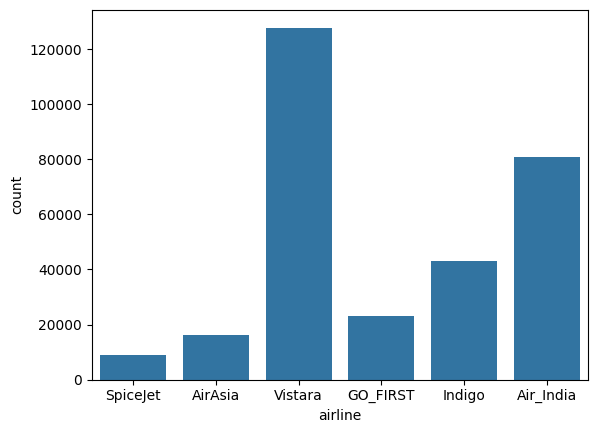

In [26]:
sns.countplot(x = 'airline', data = airline_price_data)

In [27]:
airline_cust_counts = airline_price_data['airline'].value_counts() \
                        .rename_axis('airline').to_frame('counts') \
                        .reset_index().to_dict('records')

airline_cust_counts

[{'airline': 'Vistara', 'counts': 127859},
 {'airline': 'Air_India', 'counts': 80892},
 {'airline': 'Indigo', 'counts': 43120},
 {'airline': 'GO_FIRST', 'counts': 23173},
 {'airline': 'AirAsia', 'counts': 16098},
 {'airline': 'SpiceJet', 'counts': 9011}]

In [28]:
from dvclive import Live

C:\Users\achla\Downloads\ML\dvc\dvc_venv\Lib\site-packages\dvclive\monitor_system.py:11: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  from pynvml import (


In [29]:
from dvclive import Live

with Live() as live:
    live.log_plot(
        'customer_count_by_airline',
        airline_cust_counts,
        x = 'counts',
        y = 'airline',
        template = 'bar_horizontal',
        title = 'Customer Count by Airline')

In [30]:
!dvc plots show

file:///C:/Users/achla/Downloads/ML/dvc/dvc_flights_price_prediction/dvc_plots/index.html


In [31]:
!dvc plots show --open

file:///C:/Users/achla/Downloads/ML/dvc/dvc_flights_price_prediction/dvc_plots/index.html
To enable auto opening, you can run:

	dvc config plots.auto_open true


In [32]:
records_df = airline_price_data.groupby('airline').mean(numeric_only = True).reset_index()

records_df

,airline,duration,days_left,price
0,AirAsia,8.941714,27.735184,4091.072742
1,Air_India,15.504235,25.497466,23507.019112
2,GO_FIRST,8.755380,27.430415,5652.007595
3,Indigo,5.795197,26.264309,5324.216303
4,SpiceJet,12.579767,24.122850,6179.278881
5,Vistara,13.326634,25.894532,30396.536302


In [33]:
with Live() as live:
    live.log_plot(
        'customer_count_by_airline',
        airline_price_data['airline'].value_counts()
            .rename_axis('airline').to_frame('counts')
            .reset_index().to_dict('records'),
        x = 'counts',
        y = 'airline',
        template = 'bar_horizontal',
        title = "Customer Count by Airline")
    
    live.log_plot(
        'avg_ticket_price_by_airline',
        airline_price_data.groupby('airline').mean(numeric_only = True)
            .reset_index().to_dict('records'),
        x = 'price',
        y = 'airline',
        template = 'bar_horizontal',
        title =  'Average Ticket Price by Airline')
    
    live.log_plot(
        'avg_ticket_price_by_class',
        airline_price_data.groupby('class').mean(numeric_only = True)
            .reset_index().to_dict('records'),
        x = 'price',
        y = 'class',
        template = 'bar_horizontal',
        title =  'Average Ticket Price by Class')
    
    live.log_plot(
        'avg_ticket_price_by_stops',
        airline_price_data.groupby('stops').mean(numeric_only = True)
            .reset_index().to_dict('records'),
        x = 'price',
        y = 'stops',
        template = 'bar_horizontal',
        title =  'Average Ticket Price by Number of Stops')
    
    live.log_plot(
        'duration_vs_price',
        airline_price_data.to_dict('records'),
        x = 'duration',
        y = 'price',
        template = 'scatter',
        title =  'Duration vs. Price')
    
    live.log_plot(
        'days_left_vs_price',
        airline_price_data.to_dict('records'),
        x = 'days_left',
        y = 'price',
        template = 'scatter',
        title = 'Days Left vs. Price')

In [34]:
!dvc plots show --open

file:///C:/Users/achla/Downloads/ML/dvc/dvc_flights_price_prediction/dvc_plots/index.html
To enable auto opening, you can run:

	dvc config plots.auto_open true


In [35]:
with Live(dir = 'scatter_plots') as live:

    live.log_plot(
        'duration_vs_price',
        airline_price_data.groupby('duration').mean(numeric_only = True)
            .reset_index().to_dict('records'),
        x = 'duration',
        y = 'price',
        template = 'scatter',
        title = 'Duration vs. Price')
    
    live.log_plot(
        'days_left_vs_price',
        airline_price_data.groupby('days_left').mean(numeric_only = True)
            .reset_index().to_dict('records'),
        x = 'days_left',
        y = 'price',
        template = 'scatter',
        title = 'Days Left vs. Price')

In [36]:
airline_price_data.groupby('duration').mean(numeric_only = True) \
    .reset_index().to_csv('duration_vs_price.csv',index = False)

#To see a plot

In [37]:
!dvc plots show duration_vs_price.csv --template scatter -x duration -y price --open

file:///C:/Users/achla/Downloads/ML/dvc/dvc_flights_price_prediction/dvc_plots/index.html
To enable auto opening, you can run:

	dvc config plots.auto_open true


In [38]:
!mkdir images

A subdirectory or file images already exists.


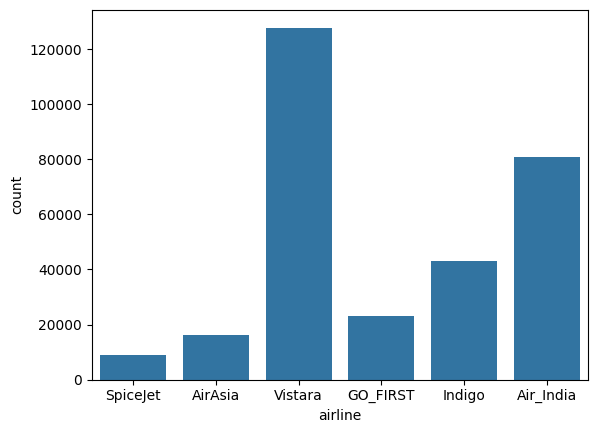

In [39]:
sns.countplot(x = 'airline', data = airline_price_data)

plt.savefig('images/customer_count_by_airline.png')

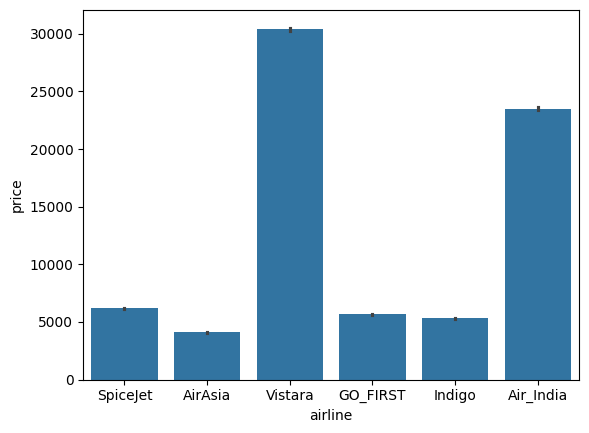

In [40]:
sns.barplot(x = 'airline', y = 'price', data = airline_price_data)

plt.savefig('images/avg_ticket_price_by_airline.png')

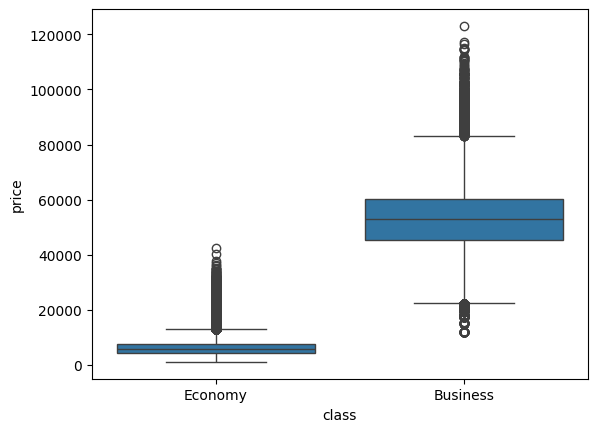

In [41]:
sns.boxplot(x = 'class', y = 'price', data = airline_price_data)

plt.savefig('images/ticket_price_by_class.png')

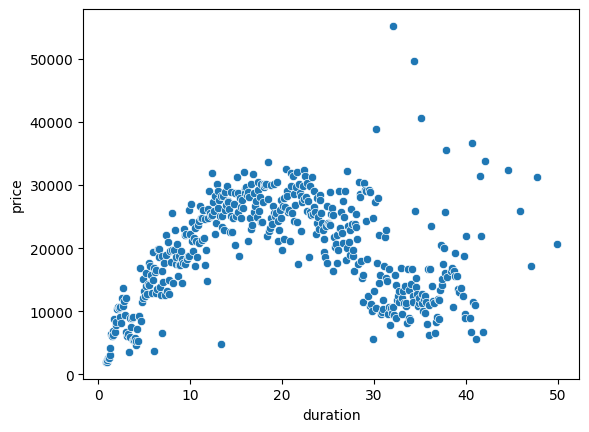

In [42]:
sns.scatterplot(x = 'duration', y = 'price', 
                data = airline_price_data.groupby('duration').mean(numeric_only = True))

plt.savefig('images/duration_vs_price.png')

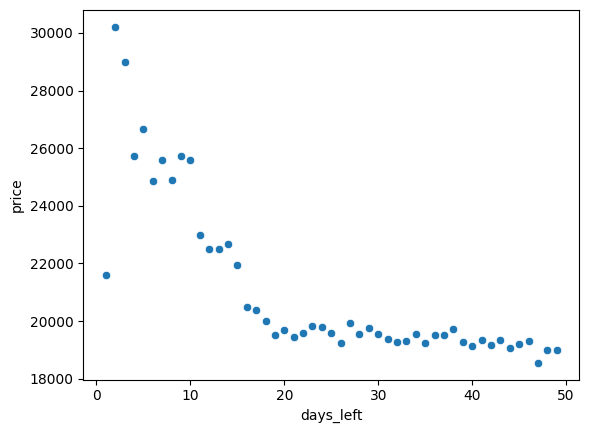

In [43]:
sns.scatterplot(x = 'days_left', y = 'price', 
                data = airline_price_data.groupby('days_left').mean(numeric_only = True))

plt.savefig('images/days_left_vs_price.png')

In [44]:
with Live() as live:   #Only logged in dvclive folder, images not cached or tracked
    live.log_image("customer_count_by_airline.png", "images/customer_count_by_airline.png")
    live.log_image("avg_ticket_price_by_airline.png", "images/avg_ticket_price_by_airline.png")
    live.log_image("ticket_price_by_class.png", "images/ticket_price_by_class.png")
    live.log_image("duration_vs_price.png", "images/duration_vs_price.png")
    live.log_image("days_left_vs_price.png", "images/days_left_vs_price.png")

See https://dvc.org/doc/user-guide/troubleshooting#git-auth
	DNC.ipynb, duration_vs_price.csv, Untitled.ipynb, .ipynb_checkpoints/DNC-checkpoint.ipynb, .ipynb_checkpoints/FlightsPricePrediction-checkpoint.ipynb, .ipynb_checkpoints/Untitled-checkpoint.ipynb


In [45]:
with Live(cache_images = True) as live: #Images cached in the DVC Remote storage 

    live.log_image("customer_count_by_airline.png", "images/customer_count_by_airline.png")
    live.log_image("avg_ticket_price_by_airline.png", "images/avg_ticket_price_by_airline.png")
    live.log_image("ticket_price_by_class.png", "images/ticket_price_by_class.png")
    live.log_image("duration_vs_price.png", "images/duration_vs_price.png")
    live.log_image("days_left_vs_price.png", "images/days_left_vs_price.png")

See https://dvc.org/doc/user-guide/troubleshooting#git-auth
	DNC.ipynb, duration_vs_price.csv, Untitled.ipynb, .ipynb_checkpoints/DNC-checkpoint.ipynb, .ipynb_checkpoints/FlightsPricePrediction-checkpoint.ipynb, .ipynb_checkpoints/Untitled-checkpoint.ipynb


In [47]:
!dir .dvc\cache /s /b

C:\Users\achla\Downloads\ML\dvc\dvc_flights_price_prediction\.dvc\cache\files
C:\Users\achla\Downloads\ML\dvc\dvc_flights_price_prediction\.dvc\cache\files\md5
C:\Users\achla\Downloads\ML\dvc\dvc_flights_price_prediction\.dvc\cache\files\md5\00
C:\Users\achla\Downloads\ML\dvc\dvc_flights_price_prediction\.dvc\cache\files\md5\0f
C:\Users\achla\Downloads\ML\dvc\dvc_flights_price_prediction\.dvc\cache\files\md5\11
C:\Users\achla\Downloads\ML\dvc\dvc_flights_price_prediction\.dvc\cache\files\md5\23
C:\Users\achla\Downloads\ML\dvc\dvc_flights_price_prediction\.dvc\cache\files\md5\3d
C:\Users\achla\Downloads\ML\dvc\dvc_flights_price_prediction\.dvc\cache\files\md5\60
C:\Users\achla\Downloads\ML\dvc\dvc_flights_price_prediction\.dvc\cache\files\md5\c2
C:\Users\achla\Downloads\ML\dvc\dvc_flights_price_prediction\.dvc\cache\files\md5\c7
C:\Users\achla\Downloads\ML\dvc\dvc_flights_price_prediction\.dvc\cache\files\md5\00\37c8243715070f68aa2c7add1f7fdf.dir
C:\Users\achla\Downloads\ML\dvc\dvc_flig

In [50]:
#to push files to local DVC location
!dvc push 

8 files pushed


### Tracking experimets with DVCLive

In [51]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = airline_price_data.drop(columns = ['price', 'flight'])
y = airline_price_data['price']

X_train, X_test, y_train, y_test = train_test_split(
    X , y, test_size = 0.3, random_state = 144)

categorical_features = [
    'airline', 
    'source_city', 
    'departure_time', 
    'arrival_time', 
    'destination_city', 
    'stops', 'class'
]

categorical_transformer = Pipeline(
    steps = [(
        'encoder_cat', OneHotEncoder(
            handle_unknown = 'ignore', 
            drop = 'first', sparse_output = False)
        )
    ]
)

preprocessor = ColumnTransformer(
    transformers = [(
        'cat_tr', categorical_transformer, categorical_features
    )], 
    remainder = StandardScaler()
)

In [52]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

# Access regression parameters
params_reg = lr_model.get_params()
print(params_reg)

pipe_lr = Pipeline(steps = [('preprocessor', preprocessor), ('regressor', lr_model)])

pipe_lr.fit(X_train, y_train)

y_pred = pipe_lr.predict(X_test)
    
training_score = pipe_lr.score(X_train, y_train)
mean_abs_error = mean_absolute_error(y_test, y_pred)
root_mean_sq_error = mean_squared_error(y_test, y_pred)
r_sq_score = r2_score(y_test, y_pred)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False, 'tol': 1e-06}


In [60]:
with Live(
    dir = 'linear_regression', 
    save_dvc_exp = True, 
    exp_message = 'Flights price prediction with linear regression'
) as live:
    
    live.log_artifact(
        'data/airline_price_data.csv',
        type = 'dataset',
        name = 'flightprices',
        desc = 'Flights price prediction dataset',
        labels = ['regression', 'prices'],
    )
    
    for param_name, param_value in params_reg.items():
        live.log_param(param_name, param_value)

    live.log_metric('training_r2_score', training_score)   
    live.log_metric('mae', mean_abs_error)
    live.log_metric('rmse', root_mean_sq_error)
    live.log_metric('r2_score', r_sq_score)

See https://dvc.org/doc/user-guide/troubleshooting#git-auth
	DNC.ipynb, duration_vs_price.csv, Untitled.ipynb, .ipynb_checkpoints/DNC-checkpoint.ipynb, .ipynb_checkpoints/FlightsPricePrediction-checkpoint.ipynb, .ipynb_checkpoints/Untitled-checkpoint.ipynb


In [62]:
!dvc exp list

main:
	4a5e382 [chirk-whit]
	e447548 [dread-foil]
	2f49c00 [mardy-aura]
	8a11f65 [potty-suer]


In [63]:
!dvc exp show

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [64]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   FlightsPricePrediction.ipynb
	modified:   dvc.yaml
	modified:   dvc_plots/index.html
	modified:   dvclive/plots/images.dvc
	modified:   images/avg_ticket_price_by_airline.png

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	DNC.ipynb
	Untitled.ipynb
	duration_vs_price.csv

no changes added to commit (use "git add" and/or "git commit -a")


### FROM CMD !dvc exp push origin dread-foil

In [66]:
!git add data/

In [67]:
!git add linear_regression/

In [69]:
!git commit -m "LR Experiment with DVC Studio Working"

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   FlightsPricePrediction.ipynb
	modified:   dvc.yaml
	modified:   dvc_plots/index.html
	modified:   dvclive/plots/images.dvc
	modified:   images/avg_ticket_price_by_airline.png

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	DNC.ipynb
	Untitled.ipynb
	c
	c.pub
	duration_vs_price.csv

no changes added to commit (use "git add" and/or "git commit -a")


In [70]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   FlightsPricePrediction.ipynb
	modified:   dvc.yaml
	modified:   dvc_plots/index.html
	modified:   dvclive/plots/images.dvc
	modified:   images/avg_ticket_price_by_airline.png

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	DNC.ipynb
	Untitled.ipynb
	c
	c.pub
	duration_vs_price.csv

no changes added to commit (use "git add" and/or "git commit -a")


In [71]:
!git push -u origin main

Host key verification failed.
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


In [72]:
!git pull

Updating a8367ca..f2eb1f9

From github.com:amsha16/dvc_flights_price_prediction


   a8367ca..f2eb1f9  main              -> origin/main
 * [new branch]      dread-foil-branch -> origin/dread-foil-branch
error: Your local changes to the following files would be overwritten by merge:
	FlightsPricePrediction.ipynb
	dvc.yaml
	dvc_plots/index.html
	dvclive/plots/images.dvc
	images/avg_ticket_price_by_airline.png
Please commit your changes or stash them before you merge.
Aborting


In [73]:
!git add data/
!git add linear_regression/
!git status

On branch main
Your branch is behind 'origin/main' by 2 commits, and can be fast-forwarded.
  (use "git pull" to update your local branch)

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   FlightsPricePrediction.ipynb
	modified:   dvc.yaml
	modified:   dvc_plots/index.html
	modified:   dvclive/plots/images.dvc
	modified:   images/avg_ticket_price_by_airline.png

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	DNC.ipynb
	Untitled.ipynb
	c
	c.pub
	duration_vs_price.csv

no changes added to commit (use "git add" and/or "git commit -a")


!git pull

### KNN

In [74]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()

params_reg = knn_model.get_params()
print(params_reg)

pipe_knn = Pipeline(steps = [('preprocessor', preprocessor), ('regressor', knn_model)])

pipe_knn.fit(X_train, y_train)

y_pred = pipe_knn.predict(X_test)
    
training_score = pipe_knn.score(X_train, y_train)
mean_abs_error = mean_absolute_error(y_test, y_pred)
root_mean_sq_error = mean_squared_error(y_test, y_pred)
r_sq_score = r2_score(y_test, y_pred)

with Live(
    dir = 'knn_regression', 
    save_dvc_exp = True, 
    exp_message = 'Flights price prediction with KNN regression'
) as live:

    for param_name, param_value in params_reg.items():
        live.log_param(param_name, param_value)
        
    live.log_metric('training_r2_score', training_score)   
    live.log_metric('mae', mean_abs_error)
    live.log_metric('rmse', root_mean_sq_error)
    live.log_metric('r2_score', r_sq_score)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


	c, c.pub, DNC.ipynb, duration_vs_price.csv, Untitled.ipynb, .ipynb_checkpoints/DNC-checkpoint.ipynb, .ipynb_checkpoints/FlightsPricePrediction-checkpoint.ipynb, .ipynb_checkpoints/Untitled-checkpoint.ipynb


 From command prompt dvc exp push origin -A

In [75]:
import os
from joblib import dump

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
params_reg = rf_model.get_params()
print(params_reg)

pipe_rf = Pipeline(steps = [('preprocessor', preprocessor), ('regressor', rf_model)])

pipe_rf.fit(X_train, y_train)

y_pred = pipe_rf.predict(X_test)
    
training_score = pipe_rf.score(X_train, y_train)
mean_abs_error = mean_absolute_error(y_test, y_pred)
root_mean_sq_error = mean_squared_error(y_test, y_pred)
r_sq_score = r2_score(y_test, y_pred)

# Create a path where we store the serialized model
os.makedirs('model_dir', exist_ok = True)
model_path = os.path.join('model_dir', 'flight-price-prediction.joblib')

# Store the model in this directory
dump(pipe_rf, model_path)


with Live(
    dir = 'rf_regression', 
    save_dvc_exp = True, 
    exp_message = 'Flights price prediction with Random Forest regression'
) as live:
    
    live.log_artifact(
        'data/airline_price_data.csv',
        type = 'dataset',
        name = 'flightprices',
        desc = 'Flights price prediction dataset',
        labels = ['regression', 'prices'],
    )
    
    for param_name, param_value in params_reg.items():
        live.log_param(param_name, param_value)
    
    live.log_plot(
        'predicted_vs_actual_price',
        pd.DataFrame({'predicted': y_pred, 'actual': y_test}).to_dict('records'),
        x = 'actual',
        y = 'predicted',
        template = 'scatter',
        title =  'Predicted price vs. Actual price')
    
    live.log_metric('training_r2_score', training_score)   
    live.log_metric('mae', mean_abs_error)
    live.log_metric('rmse', root_mean_sq_error)
    live.log_metric('r2_score', r_sq_score)
    
    live.log_artifact(model_path, type = 'model')

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


	c, c.pub, DNC.ipynb, duration_vs_price.csv, Untitled.ipynb, .ipynb_checkpoints/DNC-checkpoint.ipynb, .ipynb_checkpoints/FlightsPricePrediction-checkpoint.ipynb, .ipynb_checkpoints/Untitled-checkpoint.ipynb


In [76]:
pd.DataFrame({'predicted': y_pred, 'actual': y_test})\
    .to_csv('predicted_vs_actual_price.csv', index = False)

In [77]:
!dvc plots show predicted_vs_actual_price.csv --template scatter -x actual -y predicted --open

file:///C:/Users/achla/Downloads/ML/dvc/dvc_flights_price_prediction/dvc_plots/index.html
To enable auto opening, you can run:

	dvc config plots.auto_open true


In [78]:
!dvc config plots.auto_open true

In [79]:
!dvc exp show

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [95]:
!dvc exp push origin brown-wide # push from cmooand prompt

ERROR: Authentication failed for: 'origin'
See https://dvc.org/doc/user-guide/troubleshooting#git-auth


In [97]:
!git pull

Already up to date.


In [100]:
!dir  model_dir



 Volume in drive C is Windows
 Volume Serial Number is 46F2-08F7

 Directory of C:\Users\achla\Downloads\ML\dvc\dvc_flights_price_prediction\model_dir

09/18/2025  05:34 PM    <DIR>          .
09/18/2025  05:44 PM    <DIR>          ..
09/18/2025  05:30 PM                33 .gitignore
09/18/2025  05:34 PM       835,865,843 flight-price-prediction.joblib
09/18/2025  05:34 PM               120 flight-price-prediction.joblib.dvc
               3 File(s)    835,865,996 bytes
               2 Dir(s)  89,349,554,176 bytes free


In [101]:
!git add model_dir/.

In [102]:
!git add rf_regression/.

In [103]:
!git add data/.

In [104]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	new file:   model_dir/.gitignore
	new file:   model_dir/flight-price-prediction.joblib.dvc
	new file:   rf_regression/metrics.json
	new file:   rf_regression/params.yaml
	new file:   rf_regression/plots/custom/predicted_vs_actual_price.json
	new file:   rf_regression/plots/metrics/mae.tsv
	new file:   rf_regression/plots/metrics/r2_score.tsv
	new file:   rf_regression/plots/metrics/rmse.tsv
	new file:   rf_regression/plots/metrics/training_r2_score.tsv

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   .dvc/config

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	DNC.ipynb
	FlightsPricePrediction.ipynb
	duration_vs_price.csv
	dvc.yaml
	dvc_plots/
	dvclive/
	images/
	knn

In [105]:
!git commit -m "Committing model, data, and experiment files for RF model"

[main 209c402] Committing model, data, and experiment files for RF model
 9 files changed, 360224 insertions(+)
 create mode 100644 model_dir/.gitignore
 create mode 100644 model_dir/flight-price-prediction.joblib.dvc
 create mode 100644 rf_regression/metrics.json
 create mode 100644 rf_regression/params.yaml
 create mode 100644 rf_regression/plots/custom/predicted_vs_actual_price.json
 create mode 100644 rf_regression/plots/metrics/mae.tsv
 create mode 100644 rf_regression/plots/metrics/r2_score.tsv
 create mode 100644 rf_regression/plots/metrics/rmse.tsv
 create mode 100644 rf_regression/plots/metrics/training_r2_score.tsv


In [106]:
!git push -u origin main

To https://github.com/amsha16/dvc_flights_price_prediction.git

branch 'main' set up to track 'origin/main'.


   347215e..209c402  main -> main

In [107]:
!mkdir loaded_model

In [108]:
!cd loaded_model

In [109]:
!dvc get https://github.com/amsh16/dvc_flights_price_prediction ../model_dir/flight-price-prediction.joblib --rev 472ca73d4e1f2f212008d63158eac1dea586bed4

ERROR: unexpected error - [Errno 2] No storage files available: 'model_dir/flight-price-prediction.joblib'

Having any troubles? Hit us up at https://dvc.org/support, we are always happy to help!


In [ ]:
from joblib import load

loaded_model = load('loaded_model/flight-price-prediction.joblib')

predictions_loaded = loaded_model.predict(X_test)
 
predictions_loaded

In [ ]:
predictions_original = y_pred
 
predictions_original

In [ ]:
assert(np.array_equal(predictions_loaded, predictions_original))

In [110]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   .dvc/config

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	DNC.ipynb
	FlightsPricePrediction.ipynb
	duration_vs_price.csv
	dvc.yaml
	dvc_plots/
	dvclive/
	images/
	knn_regression/
	predicted_vs_actual_price.csv
	scatter_plots/

no changes added to commit (use "git add" and/or "git commit -a")
